In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf

In [4]:
data = pd.read_csv(r"D:\YUKTA\Assignment\DS\Neural networks\Alphabets_data.csv")

In [5]:
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# EDA:

In [6]:
data.shape

(20000, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [9]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

**The data has no missing values.**

In [10]:
data.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [11]:
data['letter'].value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

**Visualizing data:**

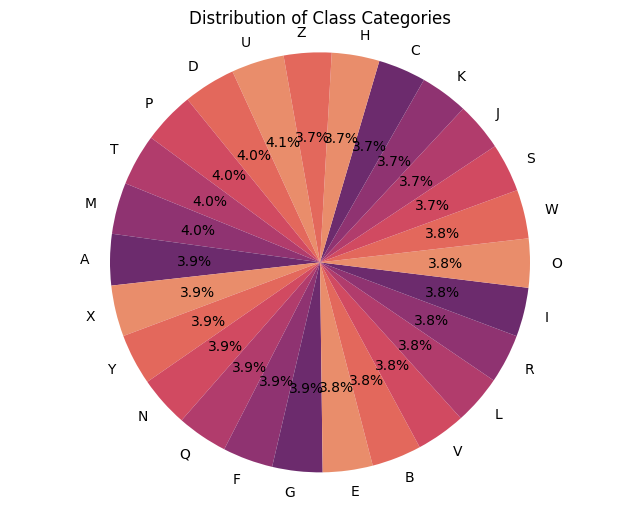

In [12]:
letter_counts = data['letter'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(letter_counts, labels=letter_counts.index, autopct='%1.1f%%', startangle=100,
       colors=sns.color_palette('flare'))
plt.title('Distribution of Class Categories')
plt.axis('equal') 
plt.show()

**Every alphabet has approximately equal amount of observations in the data.**

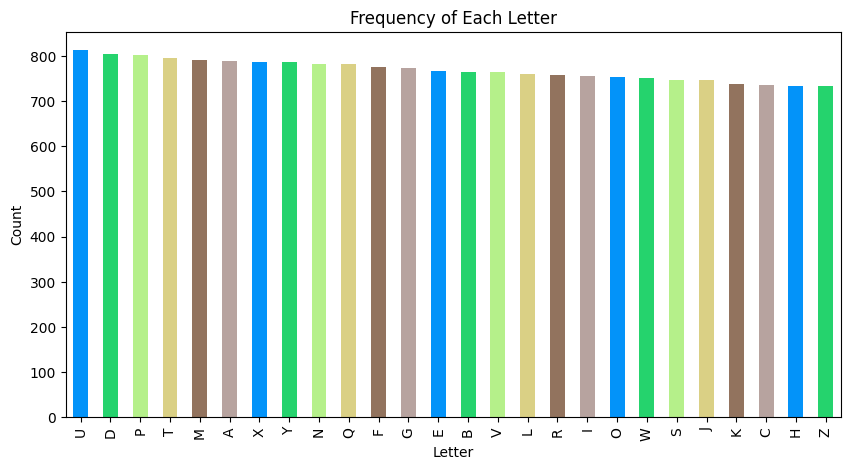

In [13]:
data['letter'].value_counts().plot(kind='bar', figsize=(10, 5),
                                  color=sns.color_palette('terrain'))
plt.xlabel('Letter')
plt.ylabel('Count')
plt.title('Frequency of Each Letter')
plt.show()

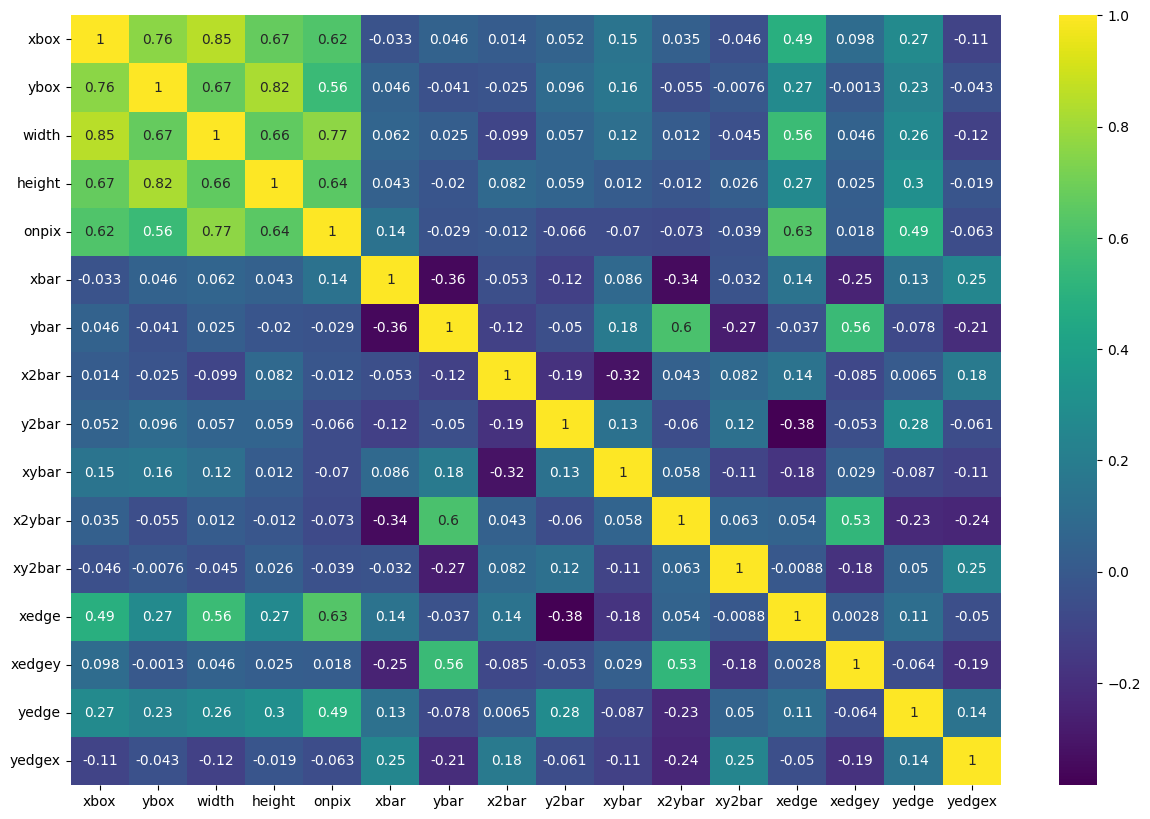

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.iloc[:,1:].corr(), annot=True, cmap='viridis')
plt.show()

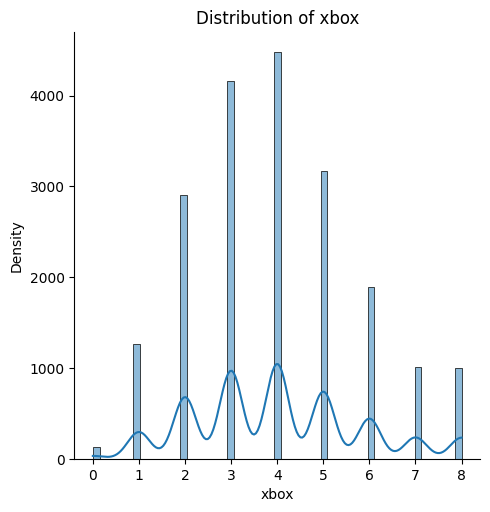

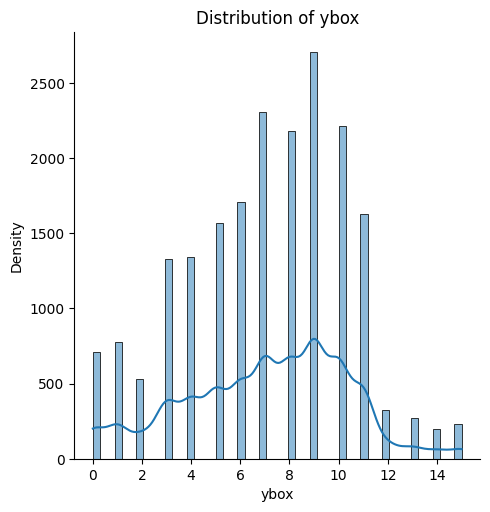

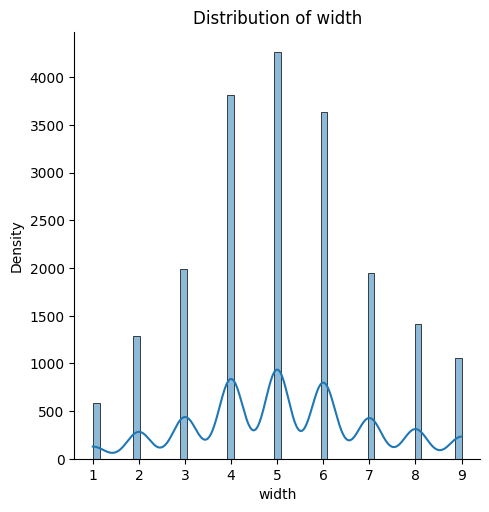

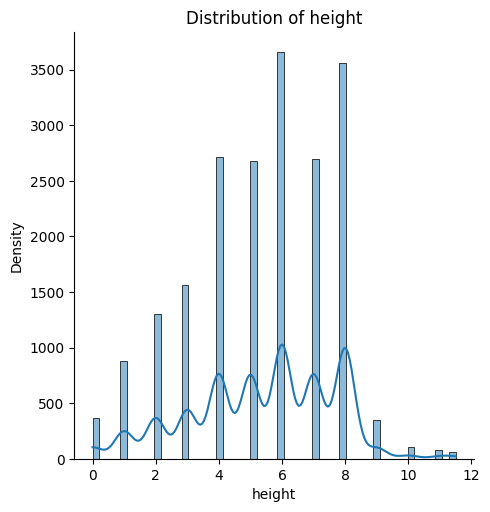

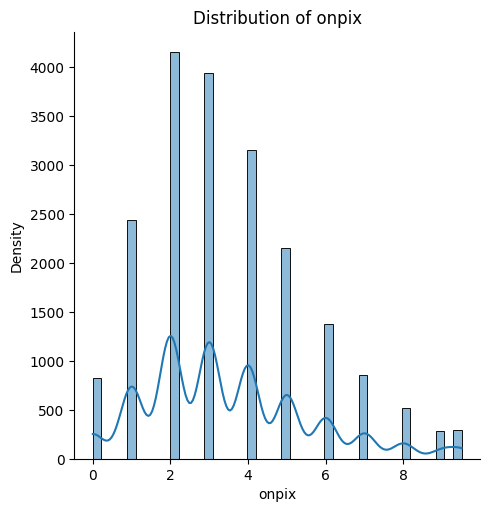

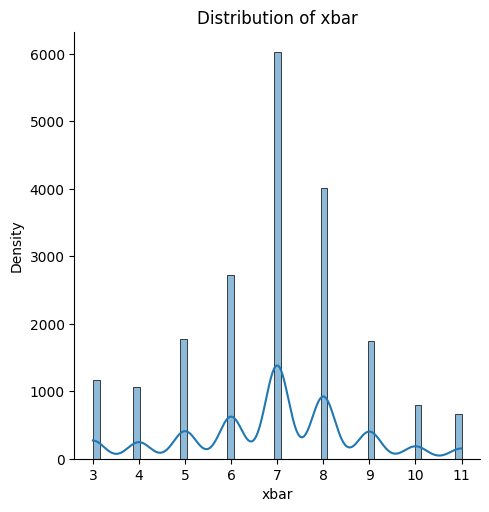

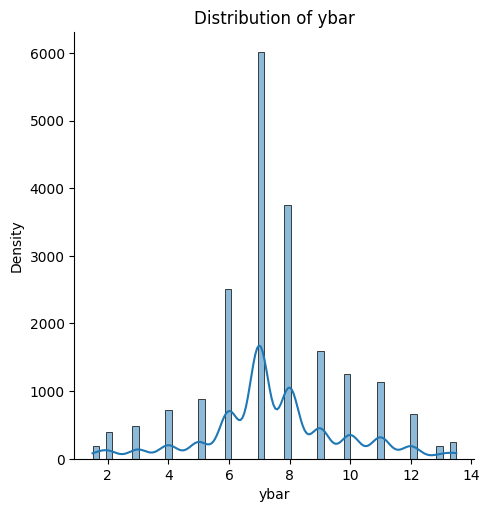

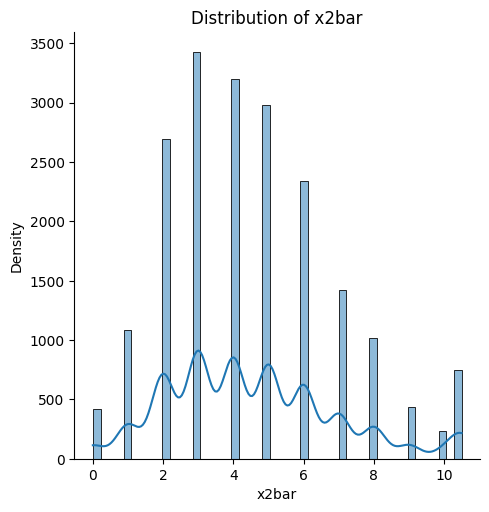

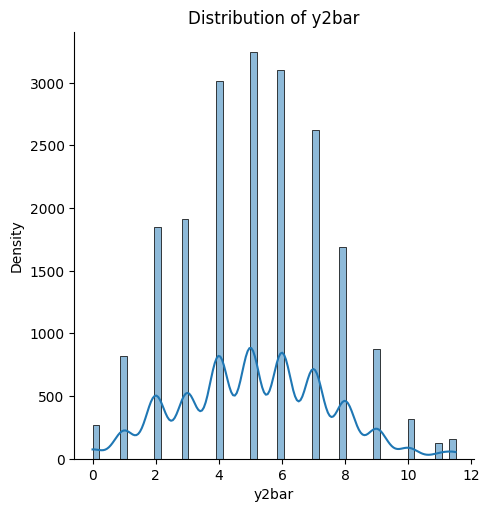

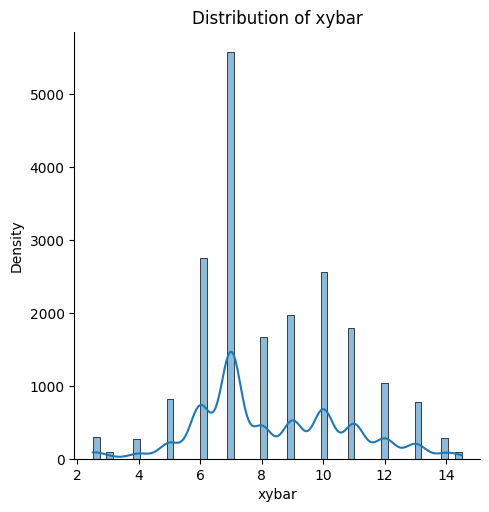

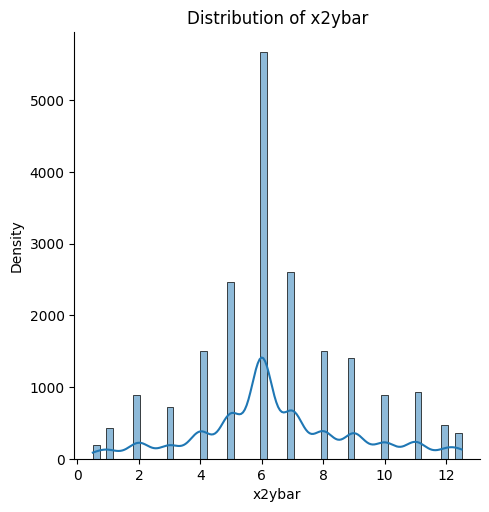

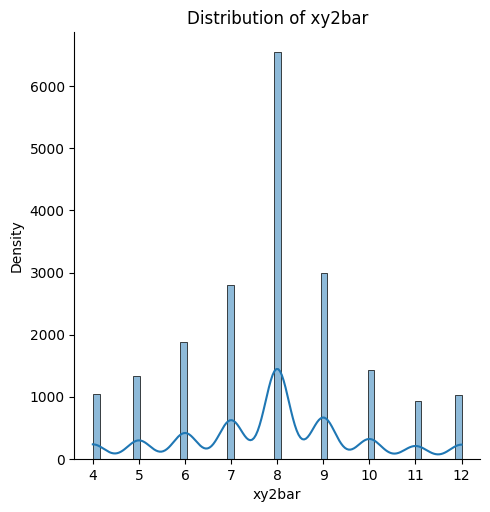

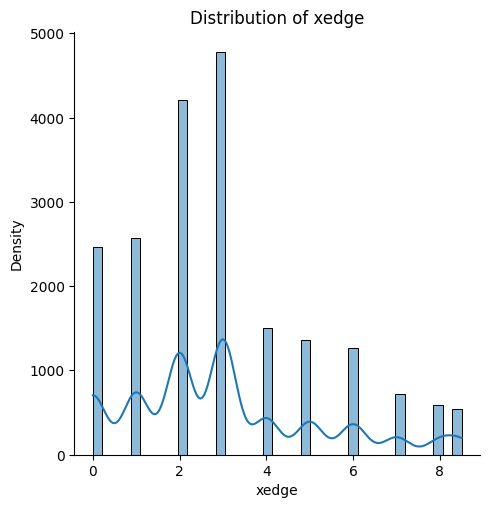

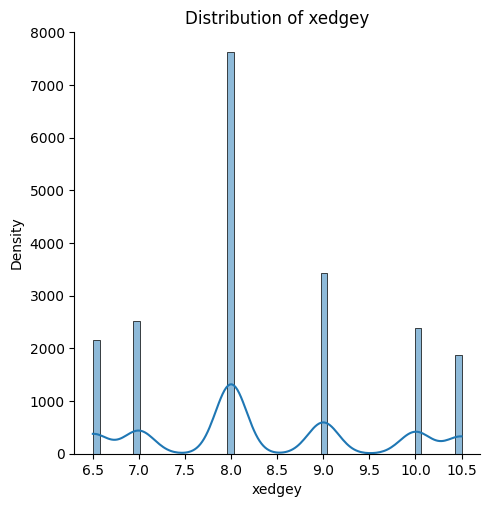

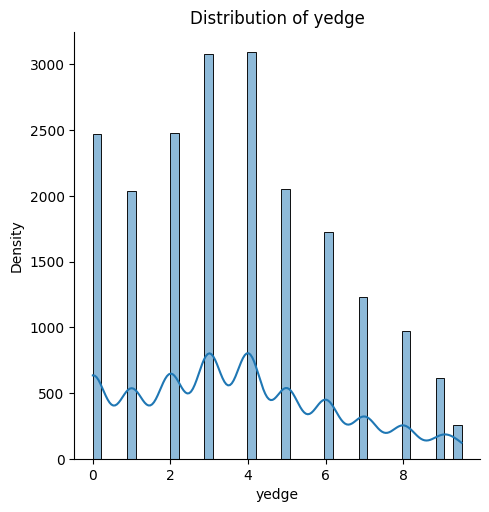

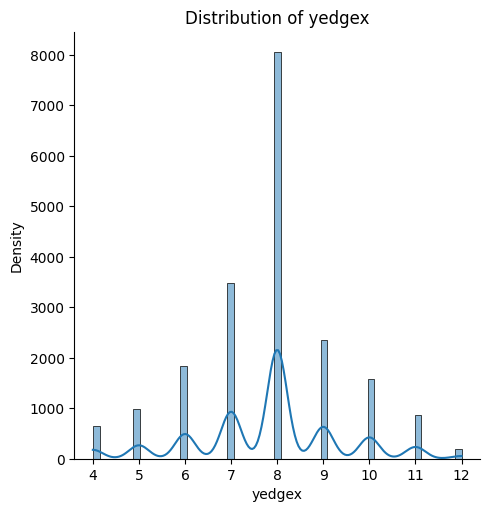

In [74]:
for col in num_list:
    sns.displot(data[col], kde=True, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

**Outlier Analysis:**

In [17]:
num_list = ['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex']

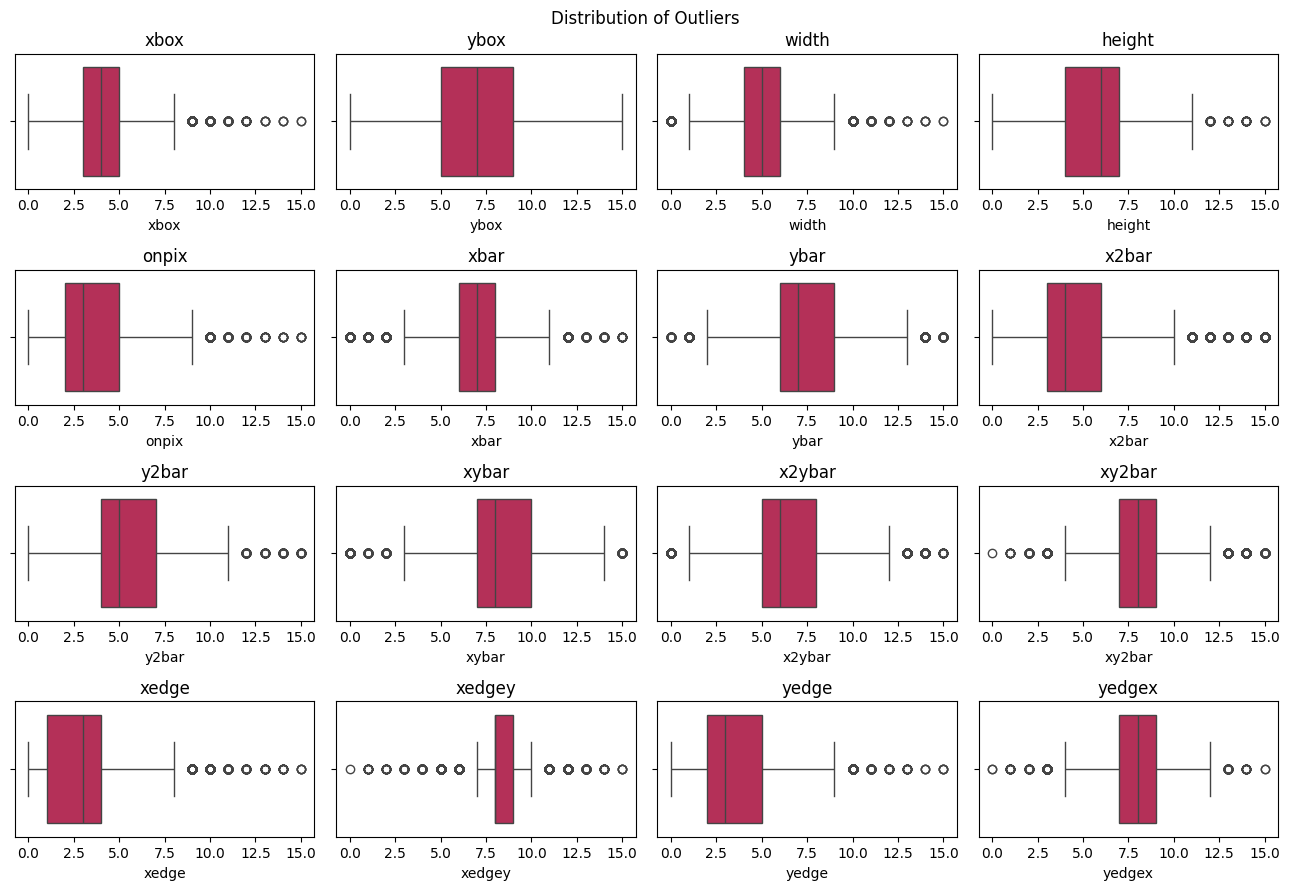

In [18]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(6,4,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'rocket_r')
    plt.title(i)
    plt.tight_layout()
    k+=1

In [19]:
out_list = ['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex']

In [20]:
# remove outliers;
for i in data.loc[:,out_list]:
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data.loc[data[i]>up_lim,i]=up_lim
    data.loc[data[i]<low_lim,i]=low_lim

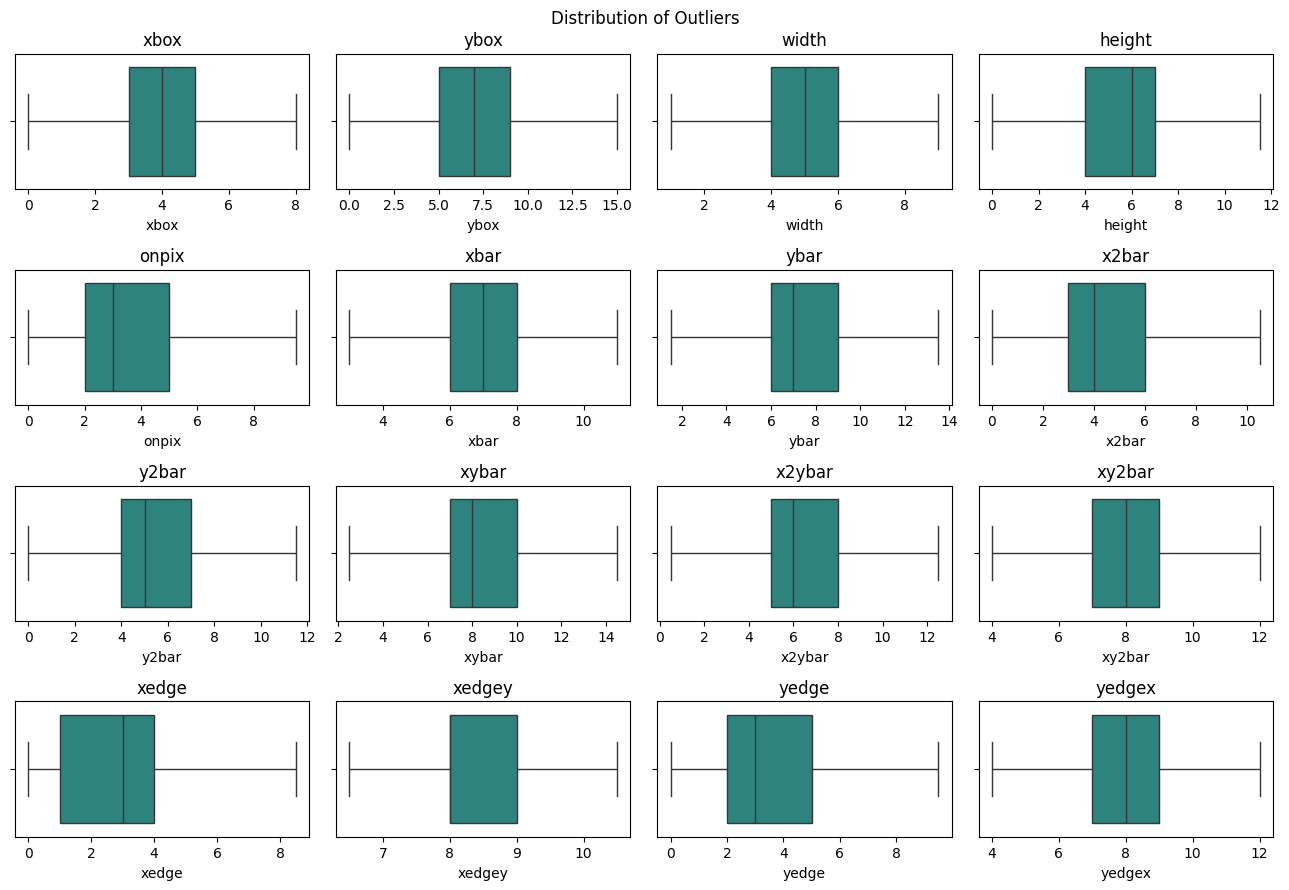

In [21]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(6,4,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'viridis')
    plt.title(i)
    plt.tight_layout()
    k+=1

**Now the data has no outliers.**

# Feature Scaling:

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

In [25]:
data['letter_encoded'] = label_encoder.fit_transform(data['letter'])

In [26]:
x = data.iloc[:,1:-1]
y = data['letter_encoded']

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
a = StandardScaler()

In [29]:
a.fit(x)

StandardScaler()

In [30]:
x_std = a.transform(x)

In [31]:
x = pd.DataFrame(x_std, columns = x.columns)

# Train-Test Splitting:

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# ANN Classification:

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Building the ANN model
model = Sequential()

In [36]:
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
3200/3200 [==============================] - 15s 4ms/step - loss: 1.6293 - accuracy: 0.5308
Epoch 2/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.8733 - accuracy: 0.7396
Epoch 3/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.7129 - accuracy: 0.7840
Epoch 4/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.6137 - accuracy: 0.8164
Epoch 5/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.5423 - accuracy: 0.8340
Epoch 6/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.4881 - accuracy: 0.8526
Epoch 7/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.4503 - accuracy: 0.8651
Epoch 8/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.4225 - accuracy: 0.8709
Epoch 9/50
3200/3200 [==============================] - 13s 4ms/step - loss: 0.3980 - accuracy: 0.8751
Epoch 10/50
3200/3200 [==============================] - 13s 4ms/step - l

In [39]:
#Making predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

125/125 [==============================] - 1s 3ms/step


In [40]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

In [41]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9085
Precision: 0.9091978789658185
Recall: 0.9085
F1 Score: 0.9084950567728775


# Hyperparameter Tuning:

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint

In [49]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', activation='relu', neurons=16):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [50]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [51]:
# Create and fit the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3, scoring='accuracy', random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018CD51ED960>,
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'batch_size': [5, 10],
                                        'epochs': [50, 100],
                                        'neurons': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018CD51EF010>,
                                        'optimizer': ['SGD', 'Adam']},
                   random_state=42, scoring='accuracy')

In [52]:
print(f"Best: {random_search.best_score_} using {random_search.best_params_}")

Best: 0.9128753782019513 using {'activation': 'relu', 'batch_size': 5, 'epochs': 100, 'neurons': 31, 'optimizer': 'Adam'}


In [53]:
best_model = random_search.best_estimator_

In [ ]:
best_model.fit(x_train, y_train, epochs=random_search.best_params_['epochs'], batch_size=random_search.best_params_['batch_size'], verbose=1)

In [64]:
y_pred_best = best_model.predict(x_test)

125/125 [==============================] - 0s 1ms/step


In [65]:
accuracy_b = accuracy_score(y_test, y_pred_best)
precision_b = precision_score(y_test, y_pred_best, average='weighted')
recall_b = recall_score(y_test, y_pred_best, average='weighted')
f1_b = f1_score(y_test, y_pred_best, average='weighted')

In [66]:
print('Evaluation score for best model:\n')
print(f'Accuracy: {accuracy_b}')
print(f'Precision: {precision_b}')
print(f'Recall: {recall_b}')
print(f'F1 Score: {f1_b}')

Evaluation score for best model:

Accuracy: 0.92025
Precision: 0.9217519828976984
Recall: 0.92025
F1 Score: 0.9201141464250957


In [67]:
# Comparison:
result = pd.DataFrame({
    'Neural Network': ['Model', 'Best model'],
    'Accuracy': [accuracy, accuracy_b],
    'Precision': [precision, precision_b],
    'Recall': [recall, recall_b],
    'F1_score': [f1, f1_b]  
})

In [68]:
print('Comparison of Results for model evaluation:')
result

Comparison of Results for model evaluation:


,Neural Network,Accuracy,Precision,Recall,F1_score
0,Model,0.90850,0.909198,0.90850,0.908495
1,Best model,0.92025,0.921752,0.92025,0.920114


# Conclusion:

The best neural network model is: 

**Best: 0.9128753782019513 using {'activation': 'relu', 'batch_size': 5, 'epochs': 100, 'neurons': 31, 'optimizer': 'Adam'}**

1) The best model achieved an **accuracy of 0.92025**, an improvement from the initial model's accuracy of 0.90850.
   
This indicates that the best model is better at correctly classifying the instances.

2) **The precision of the best model is 0.921752.**

Higher precision implies that the best model has a lower false positive rate, making it more reliable in predicting the correct classes.

**Thus we can conclude that, Hyperparameter tuning has significantly enhanced the performance of the neural network model across all evaluated metrics.** 

**The best model demonstrates higher accuracy, precision, recall, and F1 score.**